<a href="https://colab.research.google.com/github/Julian-Palacios/PMEF/blob/main/01_Viga_Quad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request 
urllib.request.urlretrieve("https://raw.githubusercontent.com/Julian-Palacios/PMEF/main/FEM_funciones_aux.py", "FEM_funciones_aux.py")

('FEM_funciones_aux.py', <http.client.HTTPMessage at 0x7f557b7bf590>)

In [2]:
from FEM_funciones_aux import *
# from DIN_funciones import *
import time
from scipy.sparse.linalg import spsolve, eigsh
import matplotlib.pyplot as plt
from scipy.linalg import eigh

Configuraciones Iniciales

In [3]:
# ProblemData (SpaceDim, 'pde')
ProblemData(2, "Elasticidad")

# ElementData (dof, nodes, noInt, 'type')
ElementData(2, 4, 4, "Quad4")

# MassData(dof, nodes, noInt, 'type')
MassData(2, 4, 4, "Quad4")

fc = 210*kgf/cm**2
E = 15000*(fc*kgf/cm**2)**0.5
# ModelData(E, v, thickness, density, selfWeight, gravity)
ModelData(E, 0.25, 0.5, 2400*kg/m**3, 0.0, np.array([0.0,-1.0,0.0]))

Definimos nuestro modelo

In [4]:
L, H, lc = 0.5*m, 10*m, 2
#
GenQuadMesh_2D(L,H,lc)

Malla del modelo definido

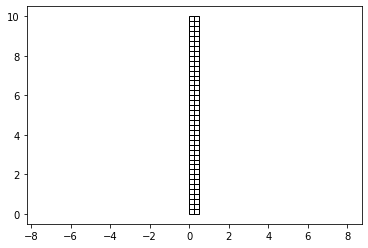

In [5]:
plot_model_mesh()

In [6]:
BC_coord=np.array([[0.0,0.0,1,1,0.0],
                     [0.0,0.0,1,2,0.0],
                     [0.0,0.5,1,1,0.0],
                     [0.0,0.5,1,2,0.0],
                     [0.5,10,0,2,1e5]])
##
BC_data = genBC_2D(BC_coord, lim=0.001)

Inicia el procedimiento para la solución de FE

In [7]:
K = AssembleMatrix('MatrizK')
M = AssembleMatrix('MasaConcentrada')
f = AssembleVector( "VectorF")
[K, f] = ApplyBC(K, f, BC_data)

Dirichlet, DOF: 0
Dirichlet, DOF: 1
Dirichlet, DOF: 12
Dirichlet, DOF: 13
Neumann, DOF: 245


Resolviendo Problema Estático

In [8]:
u =spsolve(K.tocsr(),f)
gdl_x=int((BC_data[-1,0]-1)*2+1)

print("Desplazamiento en (B,H)=",u[gdl_x])

Desplazamiento en (B,H)= 0.0007196652141949278
